question: Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [101]:
toyota = pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\ToyotaCorolla.csv",encoding_errors='ignore')

In [102]:
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [103]:
toyota1= pd.DataFrame(data=toyota, columns = ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])

In [104]:
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## EDA

In [105]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


### Rename the columns

In [106]:
toyota2 = toyota1.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)

In [107]:
toyota2

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [108]:
toyota2.shape

(1436, 9)

### Checking for null values

In [109]:
toyota2.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

### Correlation Matrix

In [110]:
toyota2.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


### Scatterplot between variables along with histograms

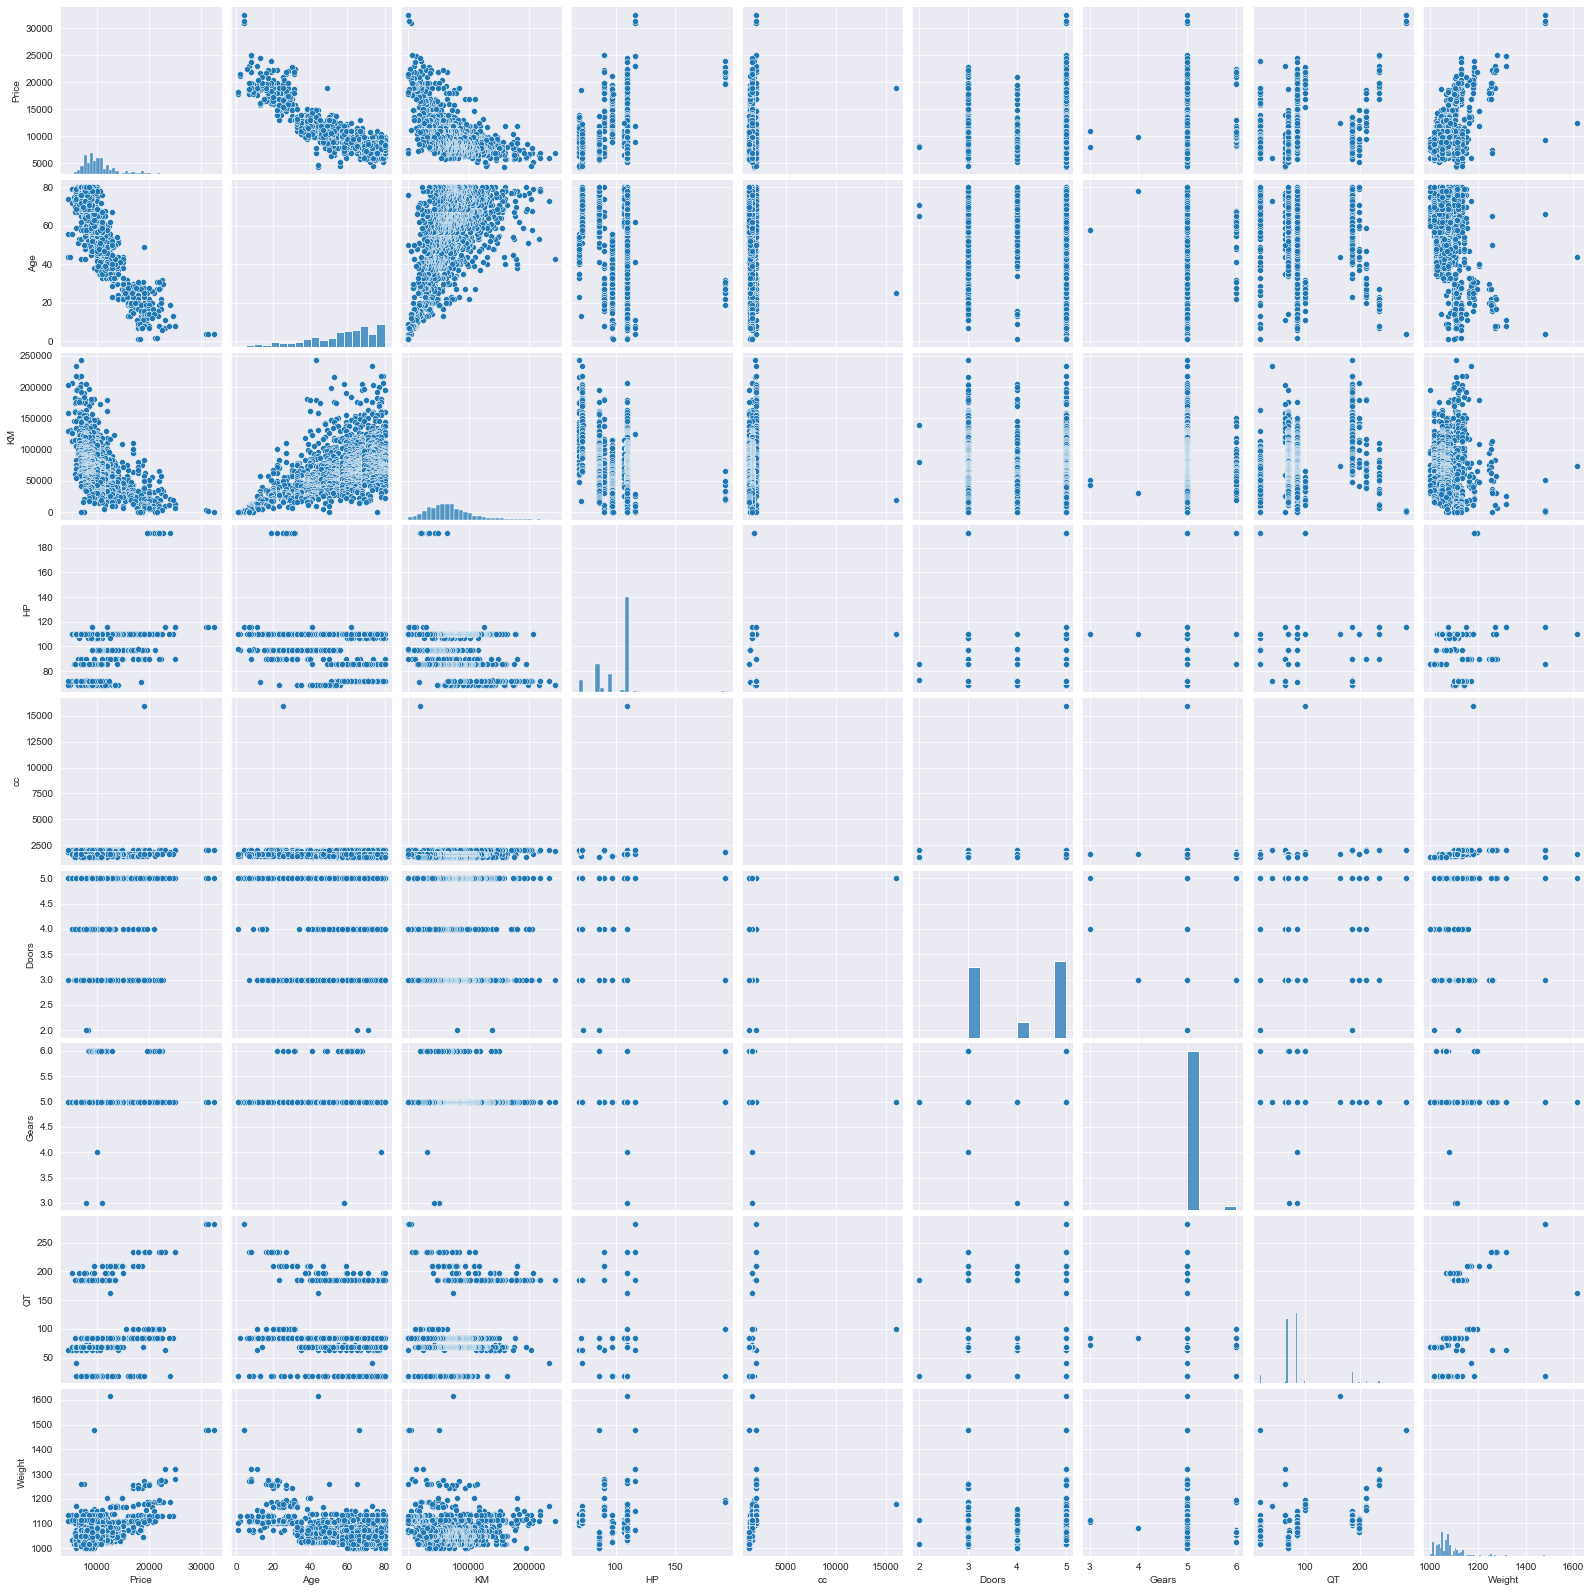

In [111]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(toyota2)

### Building a model

In [112]:
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota2).fit()

In [113]:
model.fittedvalues

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [114]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [115]:
model.pvalues

Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
QT            2.619148e-03
Weight        2.048576e-52
dtype: float64

In [116]:
toyota3=toyota2.copy()
toyota3['Predicted_values']=model.fittedvalues
toyota3['Errors_model']=model.resid
toyota3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight,Predicted_values,Errors_model
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


## Accuracy checking

In [117]:
model.rsquared,model.rsquared_adj,model.aic

(0.8637627463428192, 0.8629989775766963, 24769.07664007625)

Model accuracy is 86.37 %

## Simple Linear Regression Models

In [118]:
ml_age=smf.ols('Price~Age',data=toyota2).fit()
ml_age.pvalues

Intercept    0.0
Age          0.0
dtype: float64

In [119]:
ml_km=smf.ols('Price~KM',data=toyota2).fit()
ml_km.pvalues

Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64

In [120]:
ml_hp=smf.ols('Price~HP',data=toyota2).fit()
ml_hp.pvalues

Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64

In [121]:
ml_cc=smf.ols('Price~cc',data=toyota2).fit()
ml_cc.pvalues

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

In [122]:
ml_doors=smf.ols('Price~Doors',data=toyota2).fit()
ml_doors.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [123]:
ml_gears=smf.ols('Price~Gears',data=toyota2).fit()
ml_gears.pvalues

Intercept    0.069804
Gears        0.016775
dtype: float64

In [124]:
ml_qt=smf.ols('Price~QT',data=toyota2).fit()
ml_qt.pvalues

Intercept    1.532168e-246
QT            4.407393e-17
dtype: float64

In [125]:
ml_weight=smf.ols('Price~Weight',data=toyota2).fit()
ml_weight.pvalues

Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64

So, all variables are individually important to predict the price. Now we will check for multicollinearity. We will calculate VIF

## Model Validation ---> VIF calculation

In [126]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=toyota2).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=toyota2).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Weight',data=toyota2).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota2).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('Doors~Age+KM+HP+cc+Gears+QT+Weight',data=toyota2).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('Gears~Age+KM+HP+cc+Doors+QT+Weight',data=toyota2).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_qt=smf.ols('QT~Age+KM+HP+cc+Doors+Gears+Weight',data=toyota2).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_weight=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QT',data=toyota2).fit().rsquared
vif_weight=1/(1-rsq_weight)

#storing vif values in a dataframe
df={'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_weight]}
vif_frame=pd.DataFrame(df)
vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


No variable is involved in Multicollinearity.

## Residual Analysis

### Test for Normality of residuals (Q-Q Plot)

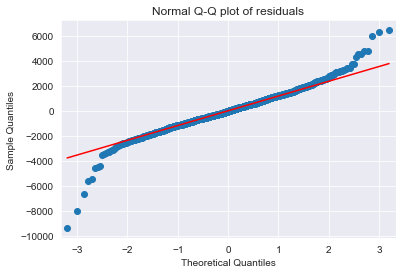

In [127]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

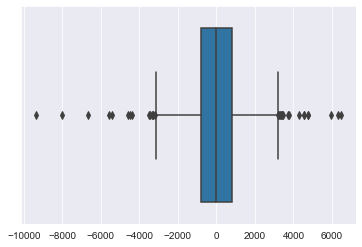

In [128]:
sns.boxplot(model.resid)

There are many outliers

<AxesSubplot:ylabel='Count'>

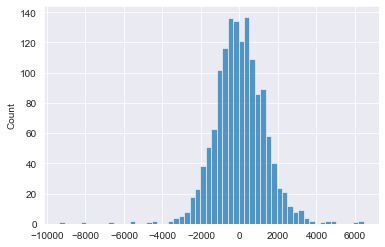

In [129]:
sns.histplot(model.resid)

### Residual Plot for Homoscedasticity

In [130]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

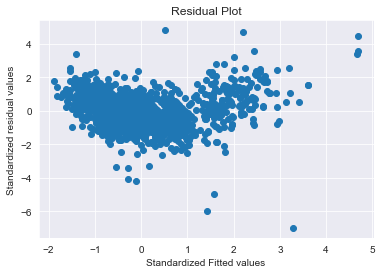

In [131]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Errors are not independent of the predicted values. We can say this is not a perfect model, So it needs further improvement.

### Residual vs Regressors

eval_env: 1


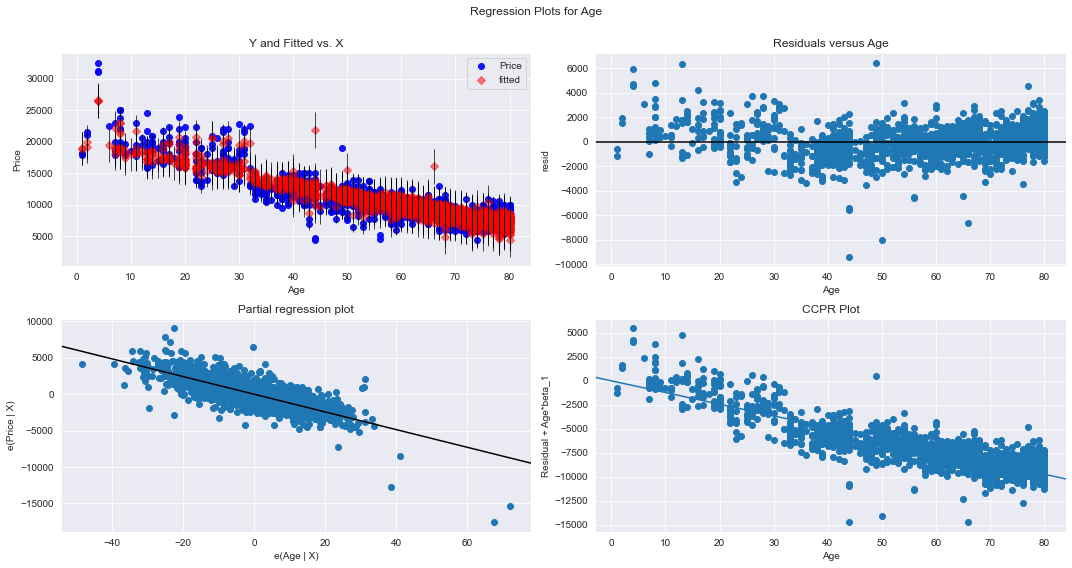

In [132]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

eval_env: 1


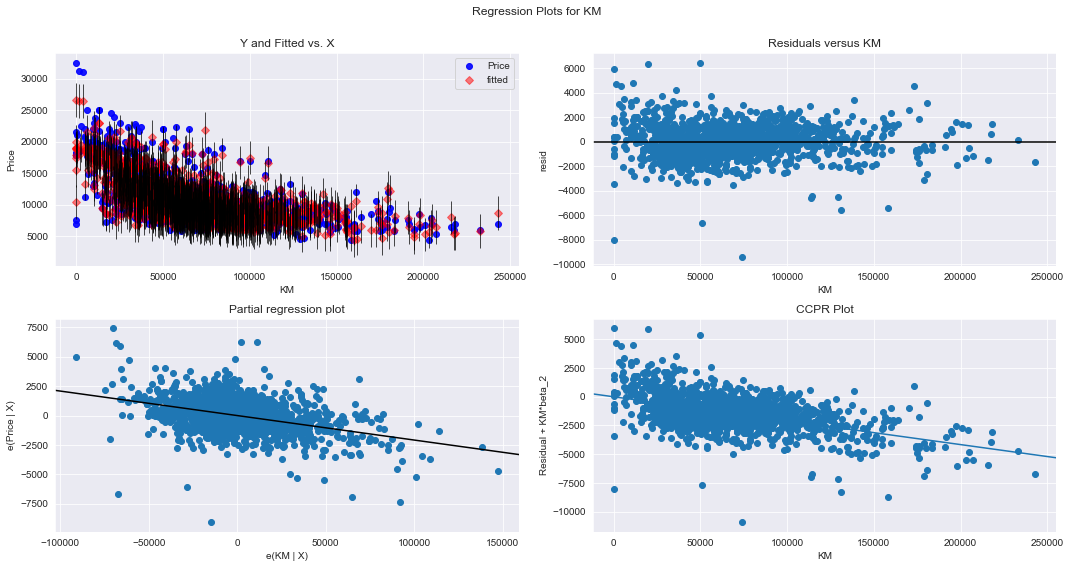

In [133]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


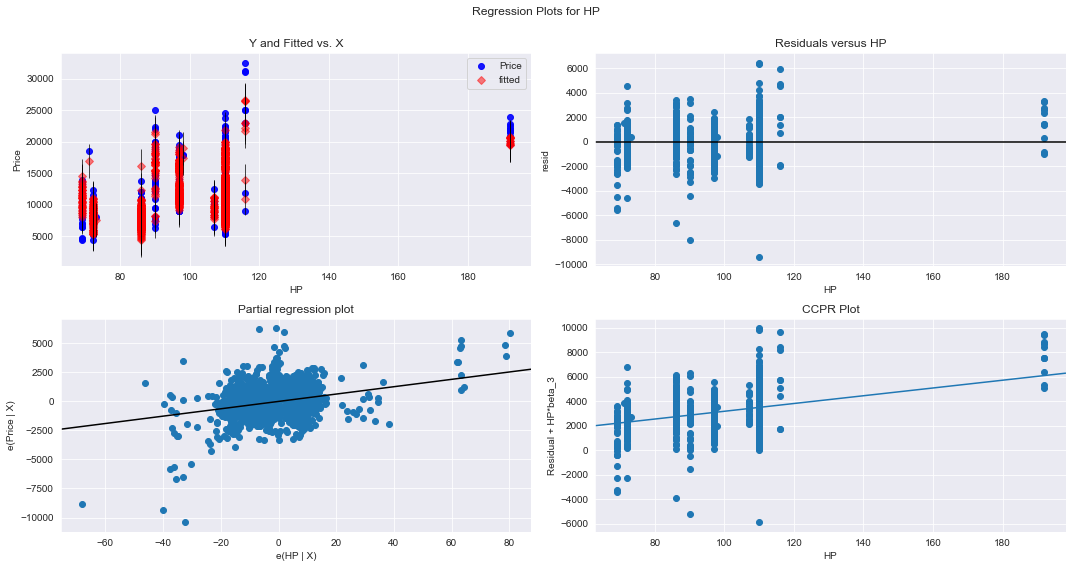

In [134]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


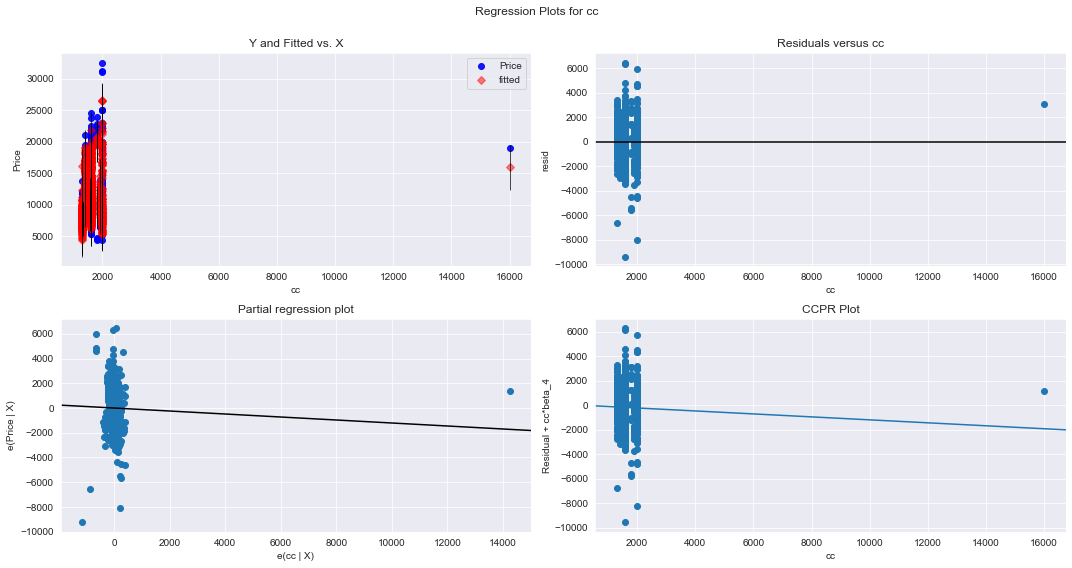

In [135]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


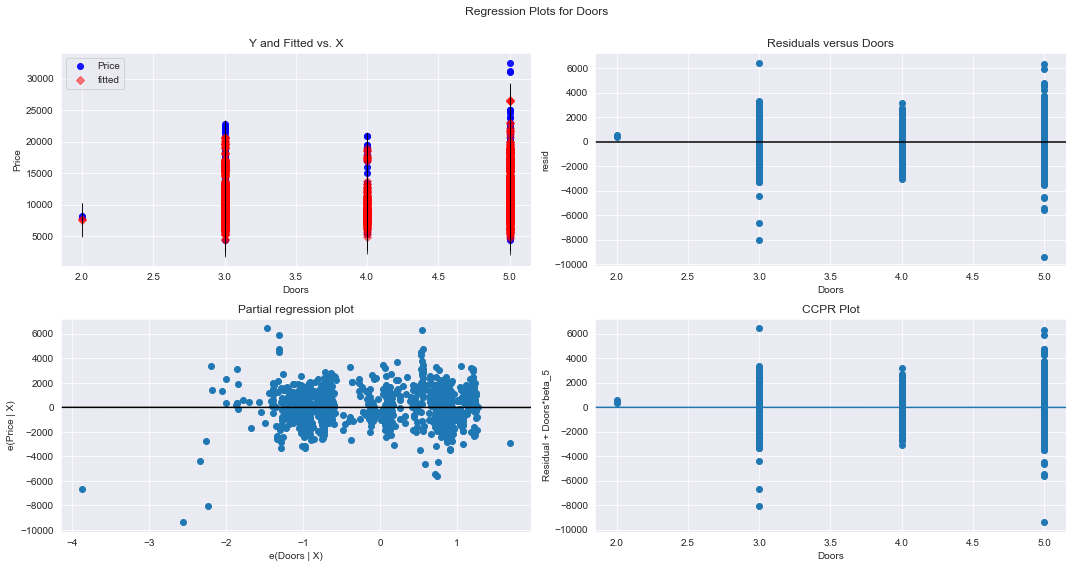

In [136]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


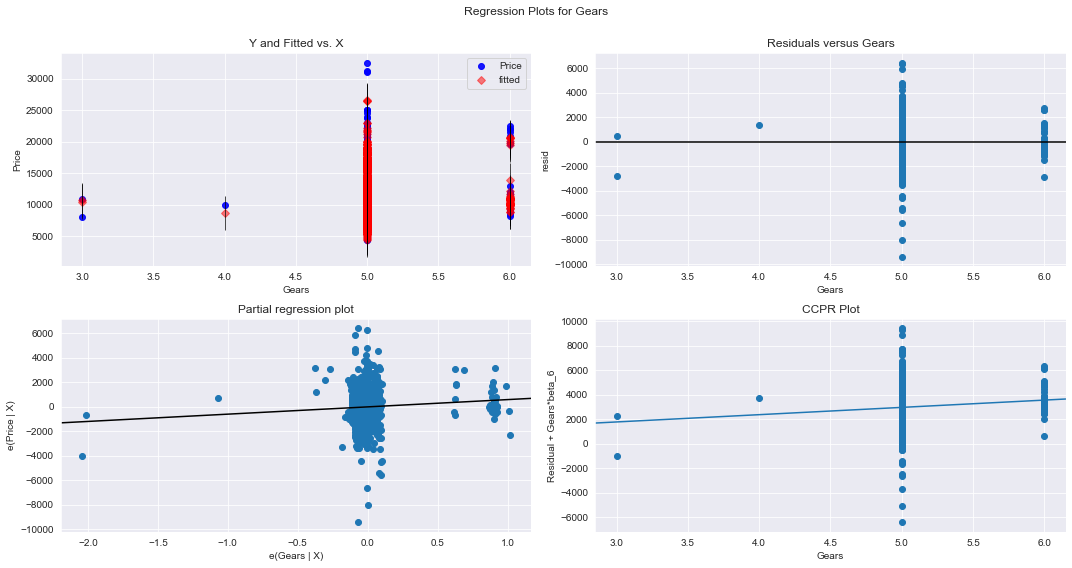

In [137]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


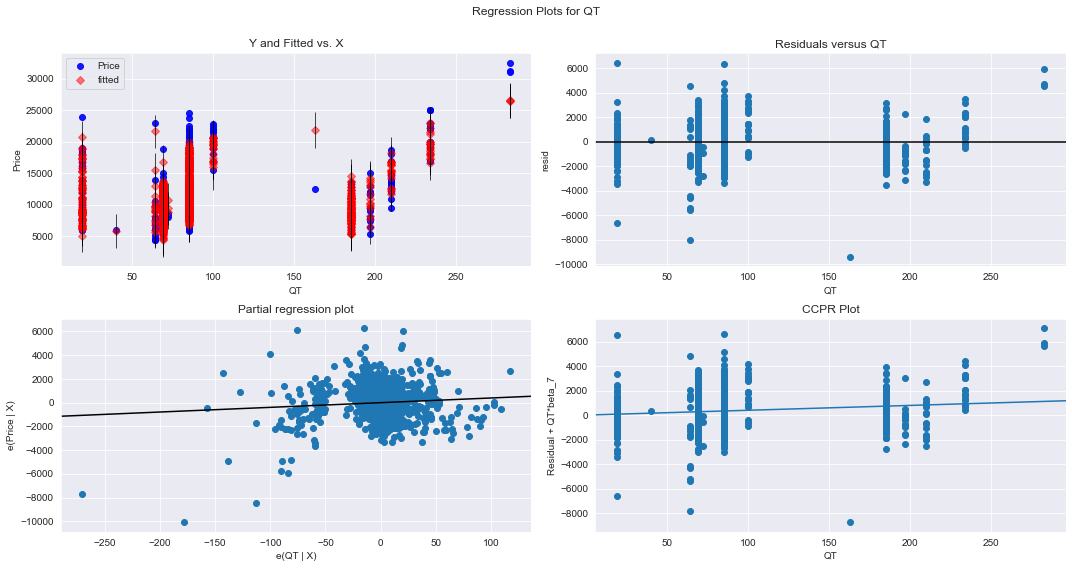

In [138]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

eval_env: 1


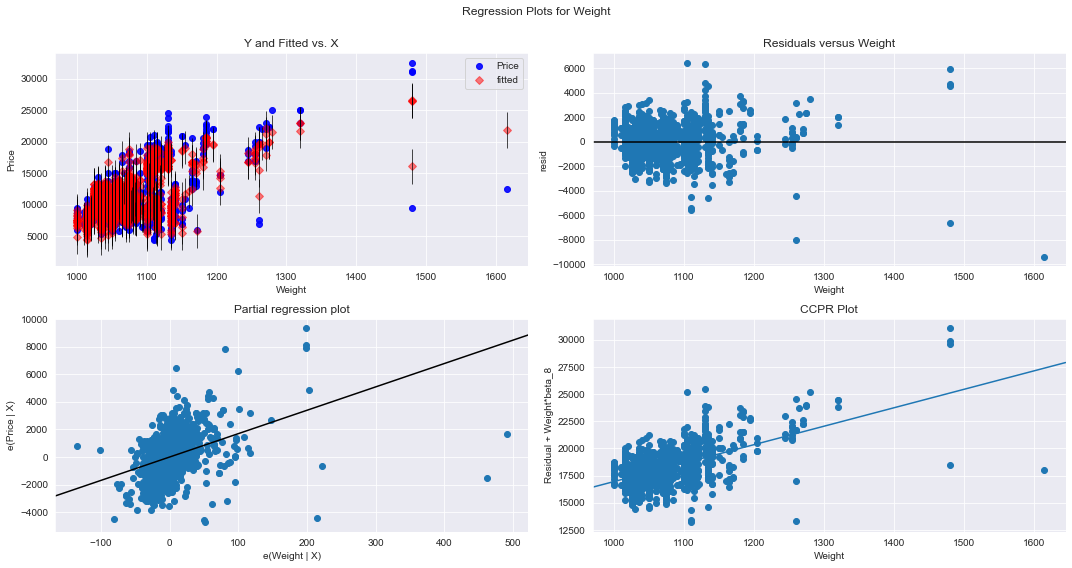

In [139]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

## Model Deletion Diagnostics

### Detecting outliers/influencers

#### Cook's Distance

In [140]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [141]:
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

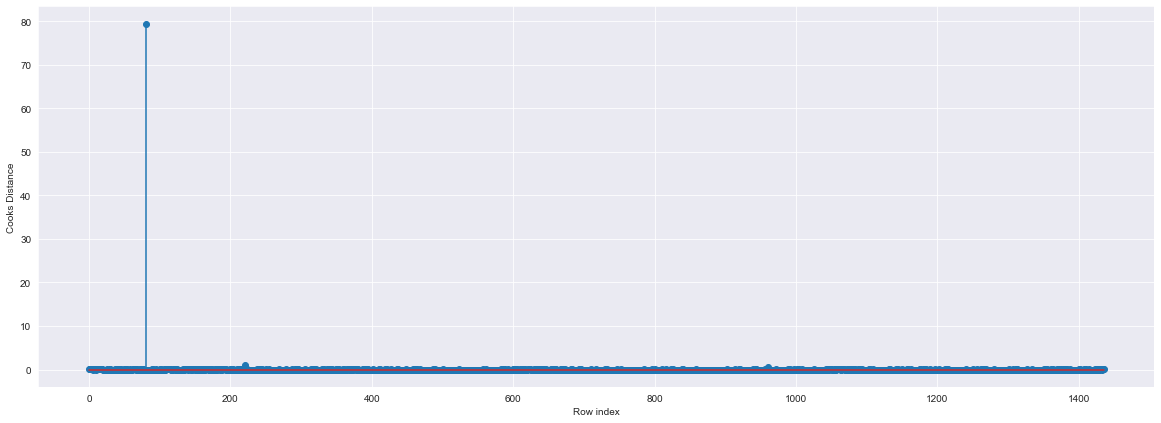

In [142]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [143]:
#index and value of influencer
(np.argmax(c),np.max(c))

(80, 79.52010624138978)

### High Influence Points

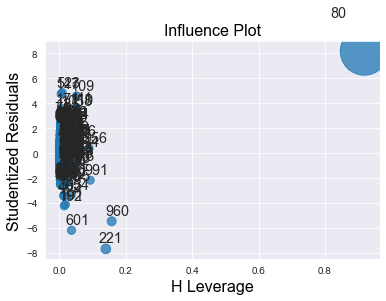

In [144]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [145]:
k=toyota2.shape[1]
n= toyota2.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020891364902506964

- we can see there are many influencers

## Improving the model

### Model deletion diagnostics

In [146]:
toyota4=toyota2.copy()
while model.rsquared < 0.95:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota4).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toyota4=toyota4.drop(toyota4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toyota4
    else:
        final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota4).fit()
        final_model.rsquared , final_model.aic
    
print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9498648792570998


In [147]:
final_model.rsquared,final_model.rsquared_adj,final_model.aic

(0.9498648792570998, 0.949357823674365, 12246.930087626619)

# So, the accuracy of our final model is 94.98 %

In [148]:
print(final_model.fittedvalues)
final_model.resid

0      12756.987742
1      16848.622570
2      16069.953265
3      15488.228151
4      15920.154569
           ...     
795     8086.717308
796     9484.916591
797     8297.460522
798     8920.124641
799     8511.388376
Length: 800, dtype: float64


0      193.012258
1      101.377430
2     -119.953265
3      261.771849
4     -170.154569
          ...    
795   -336.717308
796   -534.916591
797    152.539478
798     29.875359
799    -11.388376
Length: 800, dtype: float64

### Checking for normailty of errors of the final model

<AxesSubplot:ylabel='Density'>

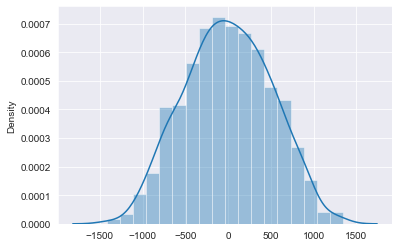

In [149]:
sns.distplot(final_model.resid)

### Final_Model Residual Plot for Homoscedasticity

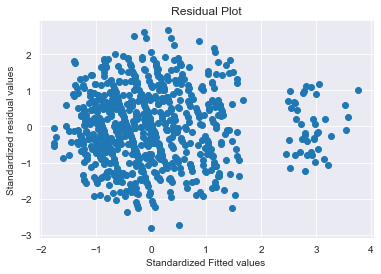

In [150]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(final_model.fittedvalues),
            get_standardized_values(final_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

- Errors are linear, means independent of predicted values. So final model is a good model.

## Prediction for new data points

In [151]:
data=pd.DataFrame({'Age':25,'KM':50000,'HP':91,'cc':2000,'Doors':5,'Gears':5,'QT':200,'Weight':1175},index=[1])

In [152]:
final_model.predict(data)

1    14323.134163
dtype: float64

In [153]:
data['Predicted value'] = final_model.predict(data)

In [154]:
data

,Age,KM,HP,cc,Doors,Gears,QT,Weight,Predicted value
1,25,50000,91,2000,5,5,200,1175,14323.134163
